# 5. Tokenization

## Objetivo

- L√¶s alumn√¶s entender√°n la importancia de la tokenizaci√≥n en un pipeline de NLP
- Como var√≠a un corpus sin tokenizar y uno tokenizado
- Explorar m√©todos de *Subword tokenization* como: *BPE*, *WordPiece* y *Unigram*

## Tokenization

- Buscamos tener unidades de informaci√≥n para representar una lengua
    - Transformar nuestro texto crudo en datos que pueda procesar nuestro modelo
- La unidad m√°s intuitiva son las palabras alfa-numericas separadas por
espacios (tokens)
- Segmentaci√≥n de texto en *tokens* de ah√≠ el nombre *tokenization*
    - Es una parte fundamental de un *pipeline* de *NLP*

In [ ]:
"Mira mam√° estoy en la tele".split()

['Mira', 'mam√°', 'estoy', 'en', 'la', 'tele']

## Word-based tokenization

- F√°cil de implementar (`.split()`)
- Se pueden considerar los signos de puntuaci√≥n agregando reglas simples

In [199]:
import re
text = "Let's get started son!!!"
re.findall(r"['!]|\w+", text)

['Let', "'", 's', 'get', 'started', 'son', '!', '!', '!']

### Problem?

<img src="http://images.wikia.com/battlebears/images/2/2c/Troll_Problem.jpg" with="250" height="250">

- Vocabularios gigantescos dif√≠ciles de procesar
- Generalmente, entre m√°s grande es el vocabulario m√°s pesado ser√° nuestro modelo

**Ejemplo:**
- Si queremos representaciones vectoriales de nuestros tokens obtendr√≠amos vectores distintos para palabras similares
    - ni√±o = `v1(39, 34, 5,...)`
    - ni√±os = `v2(9, 4, 0,...)`
    - ni√±a = `v3(2, 1, 1,...)`
    - ...
- Tendr√≠amos tokens con baj√≠sima frecuencia
    - merequetengue = `vn(0,0,1,...)`

### Una Soluci√≥n: Stemming/Lemmatization (AKA la vieja confiable)

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.ytimg.com%2Fvi%2FfxobA3YJCpk%2Fmaxresdefault.jpg&f=1&nofb=1&ipt=962ac292fba0c909d09a3f795a98775d24e22680fb502a2a5142d9c534bd2137&ipo=images" with="250" height="250">


In [200]:
import nltk
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [201]:
from collections import Counter

brown_corpus = [word for word in brown.words() if re.match("\w", word)]
print(brown_corpus[0])
print("Tokens:", len(brown_corpus))
print("Tipos:", len(Counter(brown_corpus)))

sub_brown_corpus = brown_corpus[:100000]
print("Sub brown_corpus tipos:", len(Counter(sub_brown_corpus)))

The
Tokens: 1012528
Tipos: 55640
Sub brown_corpus tipos: 15225


In [202]:
sub_brown_corpus[-20:]

['This',
 'would',
 'be',
 'cheaper',
 'to',
 'operate',
 'and',
 'could',
 'be',
 'used',
 'for',
 'cruises',
 'during',
 'the',
 'lean',
 'winter',
 'months',
 'Also',
 'under',
 'consideration']

In [203]:
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm

2023-10-09 22:16:28.419139: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.8/12.8 MB 40.7 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2023-10-09 22:16:46.449393: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.9/12.9 MB 47.4 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [204]:
import spacy

def lemmatize(words: list, lang="en") -> list:
    model = "en_core_web_sm" if lang == "en" else "es_core_news_sm"
    nlp = spacy.load(model)
    nlp.max_length = 1500000
    lemmatizer = nlp.get_pipe("lemmatizer")
    return [token.lemma_ for token in nlp(" ".join(words))]

In [206]:
print("tipos (Vanilla):", len(Counter(sub_brown_corpus)))
print("Tipos (Lemmatized):", len(Counter(lemmatize(sub_brown_corpus))))

tipos (Vanilla): 15225
Tipos (Lemmatized): 11316


- eats -> eat
- eating -> eat
- eated -> eat
- ate -> eat

### More problems?

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fpreview.redd.it%2Fjoonhzw1sjq31.png%3Fwidth%3D960%26crop%3Dsmart%26auto%3Dwebp%26s%3D3725297033765336276d49958089880e3f64d288&f=1&nofb=1&ipt=fdcf7c99c6a13417957a3832a14ca0f7ac4a70fc906fec79997bcb9795e31054&ipo=images" width="250" height="250">

- M√©todos dependientes de las lenguas
- Se pierde informaci√≥n
- Ruled-based (?)

## Subword-tokenization

- Segmentaci√≥n de palabras en unidades m√°s peque√±as (*sub-words*)
- Obtenemos tipos menos variados pero con mayores frecuencias
    - Esto le gusta modelos basados en m√©todos estad√≠sticos
- Palabras frecuentes no deber√≠an separarse
- Palabras largas y raras deber√≠a descomponerse en sub-palabras significativas
- Hay m√©todos estadisticos que no requieren conocimiento a priori de las lenguas

In [208]:
text = "Let's do tokenization!"
result = ["Let's", "do", "token", "ization", "!"]
result

["Let's", 'do', 'token', 'ization', '!']

### M√©todos para tokenizar


- *Byte-pair Encoding, BPE* (ü§ó, üíΩ)
- *Wordpiece* (ü§ó)
- *Unigram* (ü§ó)

In [209]:
!pip install sentencepiece
!pip install transformers

### BPE

- Segmenmentaci√≥n iterativa, comienza segmentando en secuencias de caracteres
- Junta los pares m√°s frecuentes (*merge operation*)
- Termina cuando se llega al n√∫mero de *merge operations* especificado o n√∫mero de vocabulario deseado (*hyperparams*, depende de la implementaci√≥n)
- Introducido en el paper: [Neural Machine Translation of Rare Words with Subword Units, (Sennrich et al., 2015)](https://arxiv.org/abs/1508.07909)

In [ ]:
%%HTML
<iframe width="760" height="415" src="https://www.youtube.com/embed/HEikzVL-lZU"></iframe>

In [210]:
SENTENCE = "Let's do this tokenization to enable hypermodernization on my tokens tokenized üëÅÔ∏è!!!"

In [211]:
from transformers import GPT2Tokenizer
bpe_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
bpe_tokenizer.tokenize(SENTENCE)

['Let',
 "'s",
 'ƒ†do',
 'ƒ†this',
 'ƒ†token',
 'ization',
 'ƒ†to',
 'ƒ†enable',
 'ƒ†hyper',
 'modern',
 'ization',
 'ƒ†on',
 'ƒ†my',
 'ƒ†tokens',
 'ƒ†token',
 'ized',
 'ƒ†√∞≈Åƒ≥',
 'ƒ£',
 '√Ø¬∏ƒ±',
 '!!!']

In [212]:
encoded_tokens = bpe_tokenizer(SENTENCE)
encoded_tokens

{'input_ids': [5756, 338, 466, 428, 11241, 1634, 284, 7139, 8718, 23922, 1634, 319, 616, 16326, 11241, 1143, 50169, 223, 37929, 10185], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [213]:
bpe_tokenizer.decode(encoded_tokens["input_ids"])

"Let's do this tokenization to enable hypermodernization on my tokens tokenized üëÅÔ∏è!!!"

- En realidad GPT-2 usa *Byte-Level BPE*
    - Evitamos vocabularios de inicio grandes (Ej: unicode)
    - Usamos bytes como vocabulario base
    - Evitamos *Out Of Vocabulary, OOV* (aka `[UKW]`) (?)

### WordPiece

- Descrito en el paper: [Japanese and Korean voice search, (Schuster et al., 2012) ](https://static.googleusercontent.com/media/research.google.com/ja//pubs/archive/37842.pdf)
- Similar a BPE, inicia el vocabulario con todos los caracteres y aprende los merges
- En contraste con BPE, no elige con base en los pares m√°s frecuentes si no los pares que maximicen la probabilidad de aparecer en los datos una vez que se agregan al vocabulario

$$score(a_i,b_j) = \frac{f(a_i,b_j)}{f(a_i)f(b_j)}$$

- Esto quiere decir que evalua la perdida de realizar un *merge* asegurandoce que vale la pena hacerlo

- Algoritmo usado en `BERT`

In [214]:
from transformers import BertTokenizer
SENTENCE = "üåΩ" + SENTENCE + "üî•"
wp_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
wp_tokenizer.tokenize(SENTENCE)

['[UNK]',
 "'",
 's',
 'do',
 'this',
 'token',
 '##ization',
 'to',
 'enable',
 'hyper',
 '##mo',
 '##dern',
 '##ization',
 'on',
 'my',
 'token',
 '##s',
 'token',
 '##ized',
 '[UNK]',
 '!',
 '!',
 '!',
 '[UNK]']

![](https://us-tuna-sounds-images.voicemod.net/9cf541d2-dd7f-4c1c-ae37-8bc671c855fe-1665957161744.jpg)

In [215]:
wp_tokenizer(SENTENCE)

{'input_ids': [101, 100, 1005, 1055, 2079, 2023, 19204, 3989, 2000, 9585, 23760, 5302, 25888, 3989, 2006, 2026, 19204, 2015, 19204, 3550, 100, 999, 999, 999, 100, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

### Unigram

- Algoritmo de subpword tokenization introducido en el paper: [Subword Regularization: Improving Neural Network Translation Models with Multiple Subword Candidates (Kudo, 2018)](https://arxiv.org/pdf/1804.10959.pdf)
- En contraste con BPE o WordPiece, este algoritmo inicia con un vocabulario muy grande y va reduciendolo hasta llegar tener un vocabulario deseado
- En cada iteraci√≥n se calcula la perdida de quitar cierto elemento del vocabulario
    - Se quitar√° `p%` elementos que menos aumenten la perdida en esa iteraci√≥n
- El algoritmo termina cuando se alcanza el tama√±o deseado del vocabulario

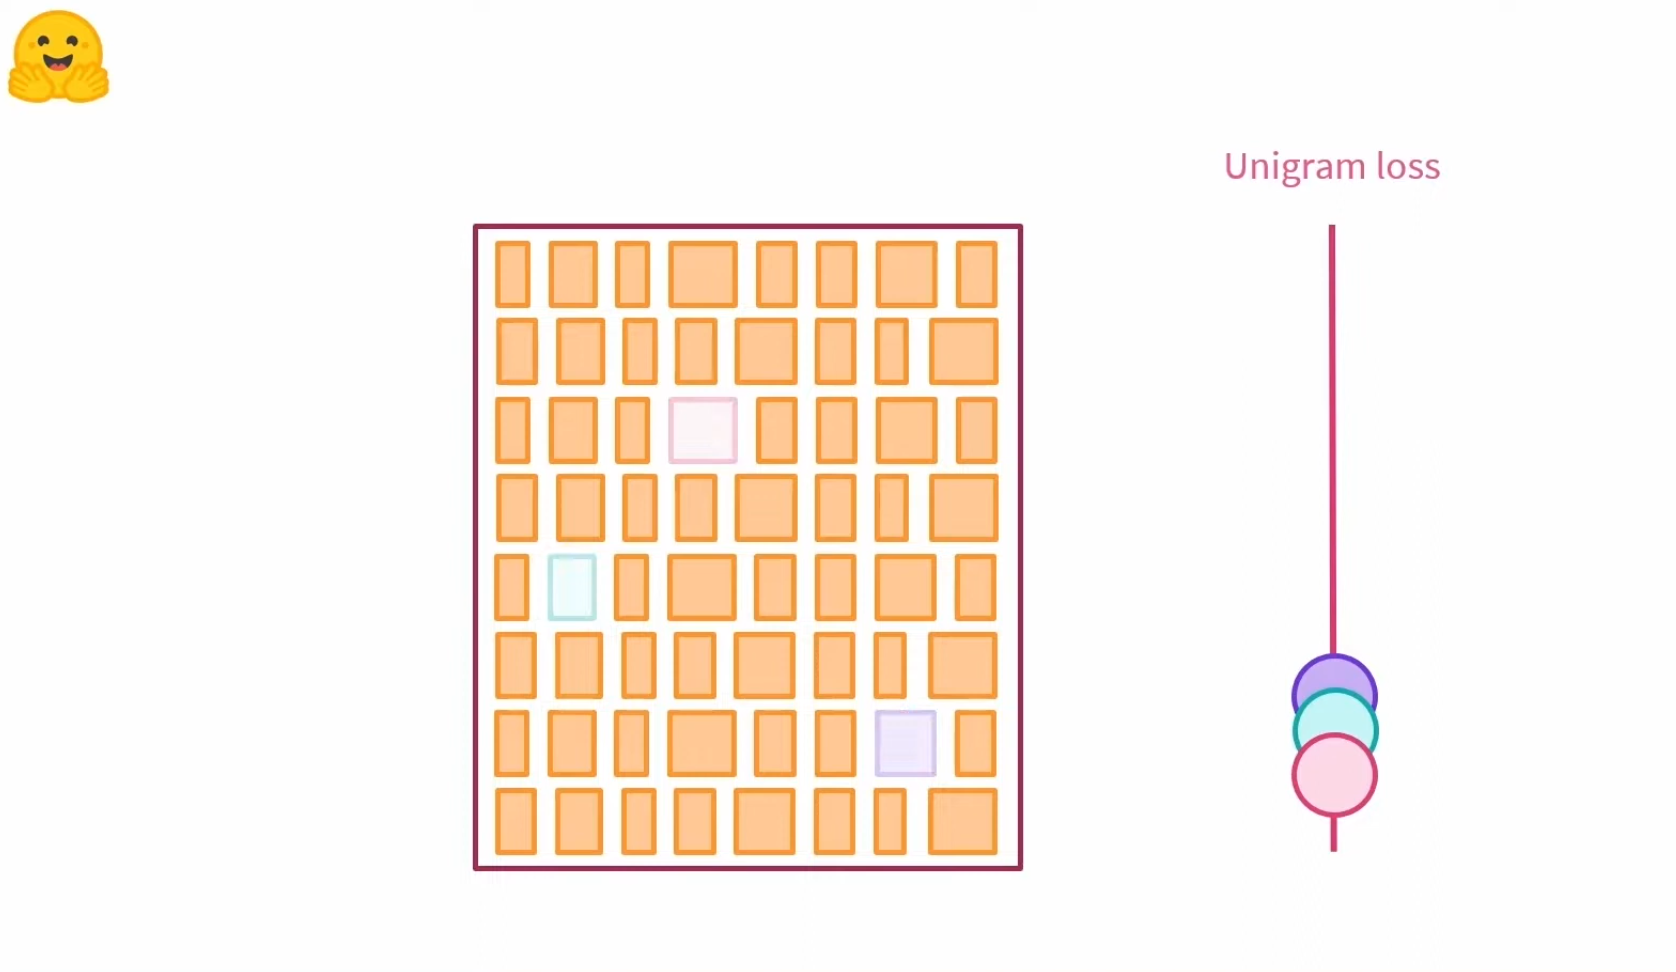

Sin embargo, *Unigram* no se usa por si mismo en algun modelo de Hugging Face:
> "Unigram is not used directly for any of the models in the transformers, but it‚Äôs used in conjunction with SentencePiece." - Hugging face guy


### SentencePiece


- No asume que las palabras estan divididas por espacios
- Trata la entrada de texto como un *stream* de datos crudos. Esto incluye al espacio como un caract√©r a usar
- Utiliza BPE o Unigram para construir el vocabulario

In [216]:
from transformers import XLNetTokenizer

tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")
tokenizer.tokenize(SENTENCE)

['‚ñÅ',
 'üåΩ',
 'Let',
 "'",
 's',
 '‚ñÅdo',
 '‚ñÅthis',
 '‚ñÅtoken',
 'ization',
 '‚ñÅto',
 '‚ñÅenable',
 '‚ñÅhyper',
 'modern',
 'ization',
 '‚ñÅon',
 '‚ñÅmy',
 '‚ñÅtoken',
 's',
 '‚ñÅtoken',
 'ized',
 '‚ñÅ',
 'üëÅÔ∏è',
 '!!!',
 'üî•']

### Objetivo de los subword tokenizers


- Buscamos que modelos de redes neuronales tenga datos mas frecuentes
- Esto ayuda a que en principio "aprendan" mejor
- Reducir el numero de tipos (?)
- Reducir el numero de OOV (?)
- Reducir la entropia (?)

## Vamos a tokenizar üåà

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.pinimg.com%2F736x%2F75%2F28%2Fe7%2F7528e71db75a37f0dcf5be8a54e0523f.jpg&f=1&nofb=1&ipt=d08ba1ed7fa9af9c3692703a667271740c22bb8e8f5b9f5f7acb44715e7d47d8&ipo=images)

### Corpus Espa√±ol: CESS

In [217]:
nltk.download("cess_esp")

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

In [218]:
from nltk.corpus import cess_esp as cess

cess_sents = cess.sents()
cess_words = cess.words()

In [219]:
len(cess_sents)

6030

In [220]:
cess_plain_text = " ".join([" ".join(sentence) for sentence in cess_sents])
cess_plain_text = re.sub(r"[-|_]", " ", cess_plain_text)

In [221]:
len(cess_plain_text)

1104297

In [222]:
cess_plain_text[300:600]

'EDF explic√≥ a EFE que el proyecto para la construcci√≥n de Altamira 2 , al norte de Tampico , prev√© la utilizaci√≥n de gas natural como combustible principal en una central de ciclo combinado que debe empezar a funcionar en mayo del 2002 . La electricidad producida pasar√° a la red el√©ctrica p√∫blica de'

### Corpus Ingl√©s: Genesis

In [223]:
nltk.download('genesis')

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!


True

In [224]:
from nltk.corpus import genesis

genesis_plain_text = genesis.raw()
genesis_words = genesis.words()

In [225]:
len(genesis_plain_text)

1420424

### Tokenizando el espa√±ol con Hugging face

In [226]:
from transformers import AutoTokenizer

spanish_tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
spanish_tokenizer.tokenize(cess_plain_text[:100])

['el',
 'grupo',
 'estatal',
 'electri',
 '##ci',
 '##t√©',
 'de',
 'france',
 'fp',
 '##a',
 'ed',
 '##f',
 'fp',
 '##t',
 'anunci√≥',
 'hoy',
 ',',
 'jueves',
 ',',
 'la',
 'compra',
 'del',
 '51',
 'por',
 'c']

In [227]:
cess_types = Counter(cess_words)
len(cess_types)

25464

In [229]:
cess_types.most_common(20)

[(',', 11420),
 ('de', 10234),
 ('la', 6412),
 ('.', 5866),
 ('que', 5552),
 ('el', 5199),
 ('en', 4340),
 ('y', 4235),
 ('*0*', 3883),
 ('"', 3038),
 ('los', 2963),
 ('a', 2953),
 ('del', 2257),
 ('se', 1884),
 ('las', 1832),
 ('un', 1815),
 ('con', 1494),
 ('por', 1456),
 ('una', 1396),
 ('su', 1291)]

In [230]:
cess_tokenized = spanish_tokenizer.tokenize(cess_plain_text)
cess_tokenized_types = Counter(cess_tokenized)
len(cess_tokenized_types)

Token indices sequence length is longer than the specified maximum sequence length for this model (236857 > 512). Running this sequence through the model will result in indexing errors


17818

In [232]:
cess_tokenized_types.most_common(30)

[('de', 11838),
 (',', 11622),
 ('*', 7767),
 ('la', 7164),
 ('.', 6534),
 ('el', 6090),
 ('que', 5948),
 ('en', 5001),
 ('y', 4441),
 ('0', 3972),
 ('a', 3634),
 ('los', 3230),
 ('"', 3050),
 ('del', 2516),
 ('se', 1957),
 ('las', 1957),
 ('por', 1949),
 ('un', 1906),
 ('fp', 1651),
 ('con', 1639),
 ('una', 1474),
 ('no', 1428),
 ('para', 1360),
 ('su', 1336),
 ('##a', 1301),
 ('al', 1241),
 ('##s', 1197),
 ('es', 1012),
 ('##t', 941),
 ('como', 788)]

In [233]:
cess_lemmatized_types = Counter(lemmatize(cess_words, lang="es"))
len(cess_lemmatized_types)

18109

In [234]:
cess_lemmatized_types.most_common(30)

[('el', 17905),
 (',', 11424),
 ('de', 10280),
 ('*', 7767),
 ('.', 5896),
 ('que', 5568),
 ('en', 4628),
 ('y', 4339),
 ('0', 3889),
 ('uno', 3631),
 ('√©l', 3565),
 ('"', 3043),
 ('a', 3006),
 ('ser', 2416),
 ('del', 2261),
 ('su', 1824),
 ('haber', 1724),
 ('con', 1545),
 ('por', 1526),
 ('no', 1354),
 ('para', 1313),
 ('-', 1240),
 ('al', 1011),
 ('este', 848),
 ('-Fpa-', 773),
 ('como', 724),
 ('-Fpt-', 676),
 ('m√°s', 664),
 ('estar', 577),
 ('tener', 569)]

### Tokenizando para el ingles

In [235]:
genesis_types = Counter(genesis_words)
len(genesis_types)

25841

In [236]:
genesis_tokenized = wp_tokenizer.tokenize(genesis_plain_text)
genesis_tokenized_types = Counter(genesis_tokenized)
len(genesis_tokenized_types)

6501

In [237]:
genesis_tokenized_types.most_common(30)

[(',', 22823),
 ('.', 12549),
 ('and', 5751),
 ('##e', 5452),
 ('##a', 5355),
 ('##t', 5220),
 ('the', 4936),
 ('##s', 4487),
 ('e', 4289),
 ('de', 3882),
 (':', 3659),
 (';', 3642),
 ('a', 3472),
 ("'", 3461),
 ('##n', 3320),
 ('##i', 3064),
 ('ja', 2970),
 ('i', 2943),
 ('of', 2862),
 ('se', 2854),
 ('##u', 2732),
 ('to', 2661),
 ('##z', 2627),
 ('und', 2611),
 ('et', 2511),
 ('och', 2460),
 ('##r', 2417),
 ('"', 2415),
 ('##h', 2399),
 ('##m', 2351)]

In [238]:
genesis_lemmatized_types = Counter(lemmatize(genesis_words))
len(genesis_lemmatized_types)

24655

In [ ]:
genesis_lemmatized_types.most_common(20)

[(',', 22823),
 ('.', 12509),
 ('and', 5639),
 ('the', 4911),
 (';', 3641),
 (':', 3641),
 ("'", 3461),
 ('e', 3264),
 ('de', 3211),
 ('of', 2839),
 ('I', 2809),
 ('be', 2774),
 ('he', 2632),
 ('"', 2427),
 ('a', 2407),
 ('und', 2030),
 ('och', 2006),
 ('to', 1849),
 ('in', 1691),
 ('et', 1645)]

## Entrenando nuestro modelo con BPE

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia1.tenor.com%2Fimages%2Fd565618bb1217a7c435579d9172270d0%2Ftenor.gif%3Fitemid%3D3379322&f=1&nofb=1&ipt=9719714edb643995ce9d978c8bab77f5310204960093070e37e183d5372096d9&ipo=images)

In [239]:
!pip install subword-nmt

In [245]:
with open("cess_plain.txt", "w") as f:
    f.write(cess_plain_text)

In [246]:
!ls

axolotl_plain_normalized.txt   cess.model
axolotl_plain_test.txt	       cess_plain.txt
axolotl_plain_test.txt.txt     cess_test_tokenized.txt
axolotl_plain_vanilla.txt      sample_data
axolotl_vanilla.model	       spa_bible_tokenized.txt
axolotl_vanilla_tokenized.txt  spa-bible.txt


In [247]:
!cat cess_plain.txt

El grupo estatal Electricit√© de France  Fpa  EDF  Fpt  anunci√≥ hoy , jueves , la compra del 51 por ciento de la empresa mexicana Electricidad √Åguila de Altamira  Fpa  EAA  Fpt  , creada por el japon√©s Mitsubishi Corporation para poner en marcha una central de gas de 495 megavatios . Una portavoz de EDF explic√≥ a EFE que el proyecto para la construcci√≥n de Altamira 2 , al norte de Tampico , prev√© la utilizaci√≥n de gas natural como combustible principal en una central de ciclo combinado que debe empezar a funcionar en mayo del 2002 . La electricidad producida pasar√° a la red el√©ctrica p√∫blica de M√©xico en virtud de un acuerdo de venta de energ√≠a de EAA con la Comisi√≥n Federal de Electricidad  Fpa  CFE  Fpt  por una duraci√≥n de 25 a√±os . EDF , que no quiso revelar cu√°nto *0* pag√≥ por su participaci√≥n mayoritaria en EAA , intervendr√° como asistente en la construcci√≥n de Altamira 2 y , posteriormente , *0* se encargar√° de explotarla como principal accionista . EDF y Mi

In [248]:
!subword-nmt learn-bpe -s 300 < cess_plain.txt > cess.model

100% 300/300 [00:01<00:00, 210.48it/s]


In [249]:
!echo "Quisiera que procesaras esta maravillosa oraci√≥n mi chavo" | subword-nmt apply-bpe -c cess.model

Q@@ ui@@ si@@ era que pro@@ c@@ es@@ ar@@ as esta mar@@ a@@ vi@@ ll@@ os@@ a or@@ aci√≥n m@@ i c@@ h@@ av@@ o


## Aplicandolo a otros corpus

In [250]:
BIBLE_FILE_NAMES = {"spa": "spa-x-bible-reinavaleracontemporanea", "eng": "eng-x-bible-kingjames"}

In [251]:
import requests

def get_bible_corpus(lang: str) -> str:
    file_name = BIBLE_FILE_NAMES[lang]
    r = requests.get(f"https://raw.githubusercontent.com/ximenina/theturningpoint/main/Detailed/corpora/corpusPBC/{file_name}.txt.clean.txt")
    return r.text

def write_plain_text_corpus(raw_text: str, file_name: str) -> None:
    with open(f"{file_name}.txt", "w") as f:
        f.write(raw_text)

In [252]:
BIBLE_FILE_NAMES['spa']

'spa-x-bible-reinavaleracontemporanea'

In [253]:
spa_bible_plain_text = get_bible_corpus('spa')
spa_bible_words = spa_bible_plain_text.replace("\n", " ").split()

In [254]:
spa_bible_words[:10]

['Principio',
 'del',
 'evangelio',
 'de',
 'Jesucristo',
 ',',
 'el',
 'Hijo',
 'de',
 'Dios']

In [255]:
len(spa_bible_words)

30073

In [256]:
spa_bible_types = Counter(spa_bible_words)
len(spa_bible_types)

3568

In [258]:
spa_bible_types.most_common(30)

[(',', 1946),
 ('.', 1099),
 ('y', 1031),
 ('de', 976),
 ('que', 924),
 ('a', 832),
 ('los', 605),
 ('la', 569),
 (':', 539),
 ('el', 507),
 ('se', 477),
 ('¬´', 423),
 ('¬ª', 423),
 ('Jes√∫s', 420),
 ('en', 413),
 ('lo', 355),
 ('le', 289),
 ('no', 268),
 ('les', 254),
 ('dijo', 252),
 ('con', 208),
 ('¬ø', 196),
 ('?', 195),
 ('al', 177),
 ('su', 170),
 ('para', 169),
 ('del', 164),
 ('¬°', 158),
 ('!', 158),
 ('por', 143)]

In [259]:
spa_bible_lemmas_types = Counter(lemmatize(spa_bible_words, lang="es"))
len(spa_bible_lemmas_types)

2316

In [260]:
write_plain_text_corpus(spa_bible_plain_text, "spa-bible")

In [261]:
!subword-nmt apply-bpe -c cess.model < spa-bible.txt > spa_bible_tokenized.txt

In [262]:
with open("spa_bible_tokenized.txt", "r") as f:
    tokenized_text = f.read()
spa_bible_tokenized = tokenized_text.split()

In [263]:
spa_bible_tokenized[:10]

['P@@', 'r@@', 'in@@', 'ci@@', 'pi@@', 'o', 'del', 'ev@@', 'an@@', 'g@@']

In [264]:
len(spa_bible_tokenized)

62332

In [265]:
spa_bible_tokenized_types = Counter(spa_bible_tokenized)
len(spa_bible_tokenized_types)

392

In [267]:
spa_bible_tokenized_types.most_common(40)

[(',', 1946),
 ('a', 1611),
 ('y', 1156),
 ('o', 1126),
 ('.', 1099),
 ('de', 1095),
 ('que', 1029),
 ('los', 851),
 ('os', 801),
 ('t@@', 800),
 ('s@@', 772),
 ('es@@', 771),
 ('es', 737),
 ('d@@', 716),
 ('en', 702),
 ('c@@', 678),
 ('e', 657),
 ('la', 657),
 ('u@@', 654),
 ('di@@', 635),
 ('√≥', 628),
 ('i@@', 613),
 ('an', 605),
 ('se', 581),
 ('el', 553),
 ('m@@', 551),
 ('r@@', 546),
 ('en@@', 541),
 (':', 539),
 ('J@@', 537),
 ('l@@', 507),
 ('lo', 505),
 ('e@@', 484),
 ('s', 481),
 ('er@@', 471),
 ('v@@', 466),
 ('√∫@@', 445),
 ('n@@', 444),
 ('as', 439),
 ('g@@', 438)]

### Type-token Ratio (TTR)

- Una forma de medir la variazi√≥n del vocabulario en un corpus
- Este se calcula como $TTR = \frac{len(types)}{len(tokens)}$
- Puede ser √∫til para monitorear la variaci√≥n lexica de un texto

In [268]:
print("Bible Spanish Information")
print("Tokens:", len(spa_bible_words))
print("Types (vanilla):", len(spa_bible_types))
print("Types (lemmatized)", len(spa_bible_lemmas_types))
print("Types (native BPE):", len(spa_bible_tokenized_types))
print("TTR (Vanilla):", len(spa_bible_types)/len(spa_bible_words))
print("TTR (BPE):", len(spa_bible_tokenized_types)/len(spa_bible_tokenized))

Bible Spanish Information
Tokens: 30073
Types (vanilla): 3568
Types (lemmatized) 2316
Types (native BPE): 392
TTR (Vanilla): 0.11864463139693412
TTR (BPE): 0.006288904575498942


## Entrenando BPE con corpus en Nahuatl

In [269]:
!pip install elotl

In [270]:
import elotl.corpus
axolotl = elotl.corpus.load("axolotl")

In [271]:
len(axolotl)

16117

In [272]:
train_rows_count = len(axolotl) - round(len(axolotl)*.30)

In [273]:
axolotl_train = axolotl[:train_rows_count]
axolotl_test = axolotl[train_rows_count:]

In [274]:
print("Axolotl train len:", len(axolotl_train))
print("Axolotl test len:", len(axolotl_test))
print("Total:", len(axolotl_test) + len(axolotl_train))

Axolotl train len: 11282
Axolotl test len: 4835
Total: 16117


In [275]:
axolotl_train[:3]

[['Vino a iluminar el sol y all√≠ fue a ver a su',
  'tlaminako tonati uan noponi kiitato',
  '',
  'Lo que relatan de antes (cuentos t√©nek y nahuas de la huasteca)'],
 ['Y as√≠, cuando hizo su ofrenda de fuego, se sienta delante de los dem√°s y una persona se queda junto a √©l.',
  'Auh in ye yuhqui in on tlenamacac niman ye ic teixpan on motlalia ce tlacatl itech mocaua.',
  '',
  'Vida econ√≥mica de Tenochtitlan'],
 ['¬øSi es jade, si es oro, acaso no tendr√° que ir all√°?',
  '¬øIn chalchihuitl, teocuitlatl, mach ah ca on yaz?',
  '',
  'Trece Poetas del Mundo Azteca']]

In [276]:
axolotl_words_vanilla_train = [word for row in axolotl_train for word in row[1].lower().split()]
len(axolotl_words_vanilla_train)

200302

In [277]:
axolotl_words_vanilla[:10]

['tlaminako',
 'tonati',
 'uan',
 'noponi',
 'kiitato',
 'auh',
 'in',
 'ye',
 'yuhqui',
 'in']

In [278]:
write_plain_text_corpus(" ".join(axolotl_words_vanilla_train), "axolotl_plain_vanilla")

In [279]:
!subword-nmt learn-bpe -s 300 < axolotl_plain_vanilla.txt > axolotl_vanilla.model

100% 300/300 [00:04<00:00, 65.21it/s] 


In [280]:
axolotl_test_words = [word for row in axolotl_test for word in row[1].lower().split()]
axolotl_test_types = Counter(axolotl_test_words)

In [281]:
axolotl_test_types.most_common(10)

[('yn', 5448),
 ('in', 4367),
 ('auh', 1359),
 ('ye', 1157),
 ('tlen', 998),
 ('ynic', 930),
 ('ihuan', 820),
 ('ipan', 780),
 ('ca', 754),
 ('de', 735)]

In [282]:
axolotl_singletons = [singleton for singleton in axolotl_test_types.items() if singleton[1] == 1]

In [283]:
len(axolotl_singletons)

19553

In [284]:
write_plain_text_corpus(" ".join(axolotl_test_words), "axolotl_plain_test")

In [285]:
!subword-nmt apply-bpe -c axolotl_vanilla.model < axolotl_plain_test.txt > axolotl_vanilla_tokenized.txt

In [286]:
with open("axolotl_vanilla_tokenized.txt") as f:
    axolotl_test_tokenized = f.read().split()

In [287]:
len(axolotl_test_tokenized)

256758

In [288]:
axolotl_test_tokenized[:10]

['o@@', 'me', 'a@@', 'xo@@', 'x@@', 'tla@@', 'n@@', 'tli', 'i@@', 'x']

In [289]:
axolotl_test_tokenized_types = Counter(axolotl_test_tokenized)

In [290]:
axolotl_test_tokenized_types.most_common(20)

[('yn', 5490),
 ('in', 5192),
 ('i@@', 5094),
 ('a@@', 4649),
 ('tla@@', 4323),
 ('o@@', 4124),
 ('qui@@', 3705),
 ('.', 3606),
 ('te@@', 3604),
 ('ti@@', 3512),
 ('ca@@', 3432),
 ('mo@@', 3061),
 ('ma@@', 3004),
 (',', 2768),
 ('to@@', 2716),
 ('l@@', 2634),
 ('y@@', 2622),
 ('no@@', 2363),
 ('co@@', 2223),
 ('h@@', 2164)]

In [291]:
print("Axolotl Information")
print("Tokens:", len(axolotl_test_words))
print("Types (vanilla):", len(axolotl_test_types))
print("Types (native BPE):", len(axolotl_test_tokenized_types))
print("TTR (Vanilla):", len(axolotl_test_types)/len(axolotl_test_words))
print("TTR (BPE):", len(spa_bible_tokenized_types)/len(axolotl_test_tokenized))
# TODO: Singletones comparation

Axolotl Information
Tokens: 86604
Types (vanilla): 25714
Types (native BPE): 451
TTR (Vanilla): 0.2969146921620249
TTR (BPE): 0.0015267294495205602


## Normalizaci√≥n

![](https://www.startpage.com/av/proxy-image?piurl=https%3A%2F%2Fimage.slidesharecdn.com%2Ffotolog-metroflog-blog-091114151901-phpapp02%2F95%2Ffotolog-metroflog-blog-25-728.jpg%3Fcb%3D1258212001&sp=1696882272Te74c680afd09150b556116c0c376ba0392e93aafa18a7d6206e6ec36e791f3c2)

In [292]:
METROFLOG_SENTENCE = "lEt'$ d√≥ tHis b√©tt√´≈ï :)"

In [293]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("huggingface-course/albert-tokenizer-without-normalizer")
tokenizer.convert_ids_to_tokens(tokenizer.encode(METROFLOG_SENTENCE))

['[CLS]',
 '‚ñÅl',
 '<unk>',
 't',
 "'",
 '$',
 '‚ñÅ',
 'd',
 '<unk>',
 '‚ñÅ',
 't',
 '<unk>',
 'is',
 '‚ñÅb',
 '<unk>',
 't',
 't',
 '<unk>',
 '‚ñÅ',
 ':',
 ')',
 '[SEP]']

In [294]:
tokenizer = AutoTokenizer.from_pretrained("albert-large-v2")
tokenizer.convert_ids_to_tokens(tokenizer.encode(METROFLOG_SENTENCE))

['[CLS]', '‚ñÅlet', "'", '$', '‚ñÅdo', '‚ñÅthis', '‚ñÅbetter', '‚ñÅ', ':', ')', '[SEP]']

#### Y para lenguas de bajos recursos digitales?

- No hay muchos recursos :(
- Pero para el nahuatl esta `pyelotl` :)

#### Normalizando el Nahuatl

In [295]:
import elotl.nahuatl.orthography

In [296]:
# Tres posibles normalizadores: sep, inali, ack
# Sauce: https://pypi.org/project/elotl/

nahuatl_normalizer = elotl.nahuatl.orthography.Normalizer("sep")

In [297]:
axolotl[1][1]

'Auh in ye yuhqui in on tlenamacac niman ye ic teixpan on motlalia ce tlacatl itech mocaua.'

In [298]:
nahuatl_normalizer.normalize(axolotl[1][1])

'au in ye yujki in on tlenamakak niman ye ik teixpan on motlalia se tlakatl itech mokaua.'

In [299]:
nahuatl_normalizer.to_phones(axolotl[1][1])

'aw in ye yu îki in on ∆õenamakak niman ye ik tei Épan on mo∆õalia se ∆õaka∆õ itetÕ° É mokawa.'

## Pr√°ctica 5: Subword tokenization



**Fecha de entrega: 15 de Octubre 11:59pm**

- Investigar como medir la entropia de un texto
- Medir la entrop√≠a de la biblia en espa√±ol y axolotl con y sin tokenizacion
    - Tokenizar con BPE native (`subword-nmt`)
- Imprimir en pantalla:
    - Entropia Nahuatl, Espa√±ol sin tokenizar
    - Entropia Nahuatl, Espa√±ol tokenizado
- Responder las preguntas:
    - ¬øAumento o disminuy√≥ la entropia para los corpus?
        - Nahuatl
        - Espa√±ol
    - ¬øQu√© significa que la entropia aumente o disminuya en un texto?
    - ¬øComo influye la tokenizacion en la entrop√≠a de un texto?

#### Extra

- Realizar el proceso de normalizaci√≥n para el texto en Nahuatl
- Entrenar un modelo con el texto normalizado
    - Usando BPE Native (`subword-nmt`)
- Comparar typos, tokens, TTR con las versiones:
    - sin tokenizar
    - tokenizado sin normalizar (Vainilla)
    - tokenizado normalizado (NRMLZ)

```python
print("Axolotl Information: Normalized VS Vanilla")
print("Tokens (Vanilla):", ...)
print("Tokens (NRMLZ):", ...)
print("Types (Raw):", ...)
print("Types (Vanilla BPE):", ...)
print("Types (NRMLZ BPE):", ...)
print("TTR (Raw):", ...)
print("TTR (Vanilla BPE):", ...)
print("TTR (NRMLZ BPE):", ...)
```

### Referencias:

- [Corpora de la biblia en varios idiomas](https://github.com/ximenina/theturningpoint/tree/main/Detailed/corpora/corpusPBC)
- [Biblioteca nativa para BPE](https://github.com/rsennrich/subword-nmt)
- [Tokenizers Hugging face](https://huggingface.co/docs/transformers/tokenizer_summary)